In [ ]:
import os
import os.path as osp
import random
from pprint import pprint

In [ ]:
def ply_render(
	pcd,
	img_h: int, img_w: int,
	eye: list, up: list,
	output_path: str
):
	'''
	'''
	import numpy as np
	import open3d as o3d
	import open3d.visualization.rendering as rendering
	renderer = rendering.OffscreenRenderer(img_h, img_w)
	# 设置背景颜色 (RGBA)
	renderer.scene.set_background([0.1, 0.1, 0.1, 1.0])

	# 创建材质
	mtl = rendering.MaterialRecord()
	mtl.base_color = [1.0, 1.0, 1.0, 1.0]  # 白色
	mtl.shader = "defaultUnlit"
	# 设置点的大小 (以像素为单位)
	# Open3D 0.19.0 及更新版本可能支持通过材质参数调整点大小
	# 对于较旧版本，可能需要查找渲染器或场景的其他属性
	mtl.point_size = 5  # 例如，将点大小设置为 5 像素
	# 将材质应用于点云
	renderer.scene.add_geometry("point_cloud", pcd, mtl)
	
	vfov = 30.0 # 垂直视场角
	aspect_ratio = img_w / img_h
	near_plane = 0.1
	far_plane = 100.0
	fov_type = rendering.Camera.FovType.Vertical
	renderer.scene.camera.set_projection(vfov, aspect_ratio, near_plane, far_plane, fov_type)
	renderer.scene.camera.look_at([0, 0, 0], eye, up)

	# 进行离屏渲染
	image_o3d = renderer.render_to_image()
	# 保存图片
	o3d.io.write_image(output_path, image_o3d)

In [42]:
import open3d as o3d
import numpy as np

PARTNO_ROOT = "../data/partanno"

syn2cls = dict()
with open(osp.join(PARTNO_ROOT, "synsetoffset2category.txt"), "r") as f:
    lines = f.readlines()
    for line in lines:
        category, synset_offset = line.strip().split()
        syn2cls[synset_offset] = category
synset_list = list(syn2cls.keys())

# 使用 np 从 synset_list 种随机挑选一个
synset = np.random.choice(synset_list, 1)[0]
print(synset)
sample_list = os.listdir(osp.join(PARTNO_ROOT, synset, "points"))

sample = osp.splitext(np.random.choice(sample_list, 1)[0])[0]
print(sample)

points = np.loadtxt(osp.join(PARTNO_ROOT, synset, "points", f"{sample}.pts"), delimiter=" ")
labels = np.loadtxt(osp.join(PARTNO_ROOT, synset, "points_label", f"{sample}.seg"), delimiter=" ").astype(np.int32)

# 根据 labels 中出现过的标签，生成一个调色盘 pallete
pallete = np.random.rand(len(np.unique(labels)), 3)
pallete = pallete / np.sum(pallete, axis=1, keepdims=True)
# pallete = (pallete * 255).astype(np.uint8)
print(pallete)

# 使用 open3d 可视化 points 和 labels
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(pallete[labels - 1])

ply_render(pcd, 512, 512, [1, 1, 1], [0, 1, 0], "test.png")

02958343
71304f56bb1165e7f42b5c72b4901f94
[[0.7173622  0.00230601 0.28033179]
 [0.05465826 0.7028913  0.24245044]
 [0.53908923 0.1423029  0.31860787]
 [0.09671764 0.50091604 0.40236632]]
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x48a7160 (threading is enabled)
EGL(1.5)
OpenGL(4.1)


In [1]:
import open3d as o3d
import numpy as np
import open3d.visualization.rendering as rendering

# 创建一个随机点云
num_points = 1000
points = np.random.rand(num_points, 3)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
# 为每个点生成随机颜色 (RGB, 范围 [0, 1])
colors = np.random.rand(num_points, 3)
pcd.colors = o3d.utility.Vector3dVector(colors)

img_width = 640
img_height = 480
renderer = rendering.OffscreenRenderer(img_width, img_height)


# 设置背景颜色 (RGBA)
renderer.scene.set_background([0.1, 0.2, 0.3, 1.0])


# 创建材质
mtl = rendering.MaterialRecord()
mtl.base_color = [1.0, 1.0, 1.0, 1.0]  # 白色
mtl.shader = "defaultUnlit"
# 设置点的大小 (以像素为单位)
# Open3D 0.19.0 及更新版本可能支持通过材质参数调整点大小
# 对于较旧版本，可能需要查找渲染器或场景的其他属性
mtl.point_size = 5  # 例如，将点大小设置为 5 像素
# 将材质应用于点云
renderer.scene.add_geometry("random_point_cloud", pcd, mtl)


# 设置相机参数
# 这里的参数需要根据你的点云范围和期望的视角进行调整
center = [0, 0, 0]  # 观察目标点
eye = [2, 2, 2]     # 相机位置
up = [0, 1, 0]      # 相机上方向
vertical_field_of_view = 60.0 # 垂直视场角
aspect_ratio = img_width / img_height
near_plane = 0.1
far_plane = 100.0
fov_type = rendering.Camera.FovType.Vertical
renderer.scene.camera.set_projection(vertical_field_of_view, aspect_ratio, near_plane, far_plane, fov_type)
renderer.scene.camera.look_at(center, eye, up)

# 进行离屏渲染
image_o3d = renderer.render_to_image()
# 保存图片
output_filename = "random_point_cloud_render.png"
o3d.io.write_image(output_filename, image_o3d)
print(f"渲染结果已保存到 {output_filename}")

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x7fb9d9d6e010 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
渲染结果已保存到 random_point_cloud_render.png


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Function '__getitem__' executed in 1.0797 seconds.


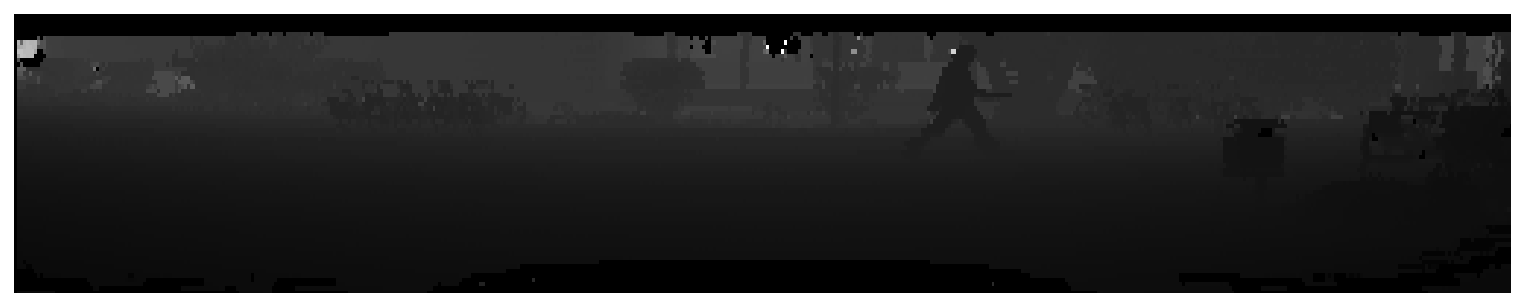

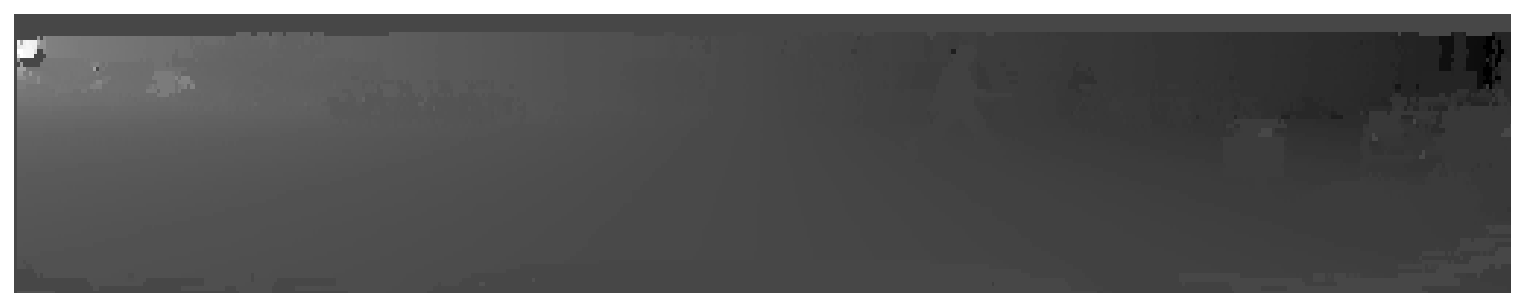

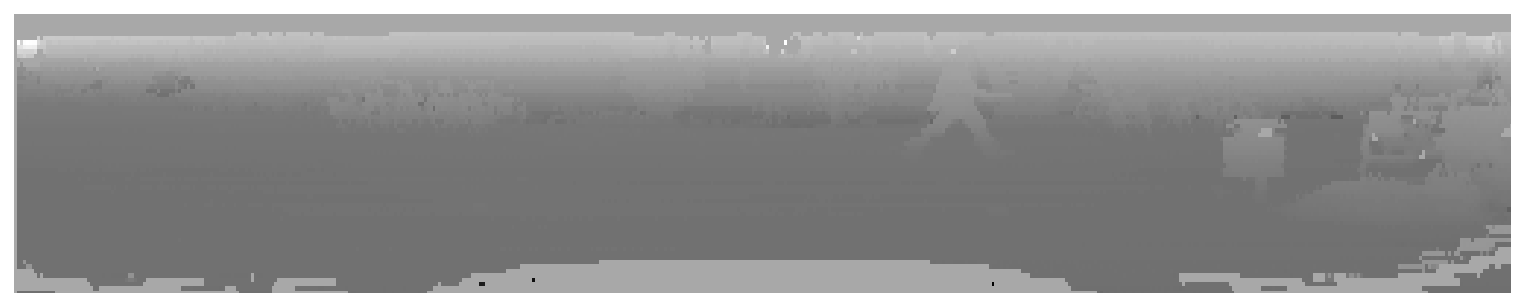

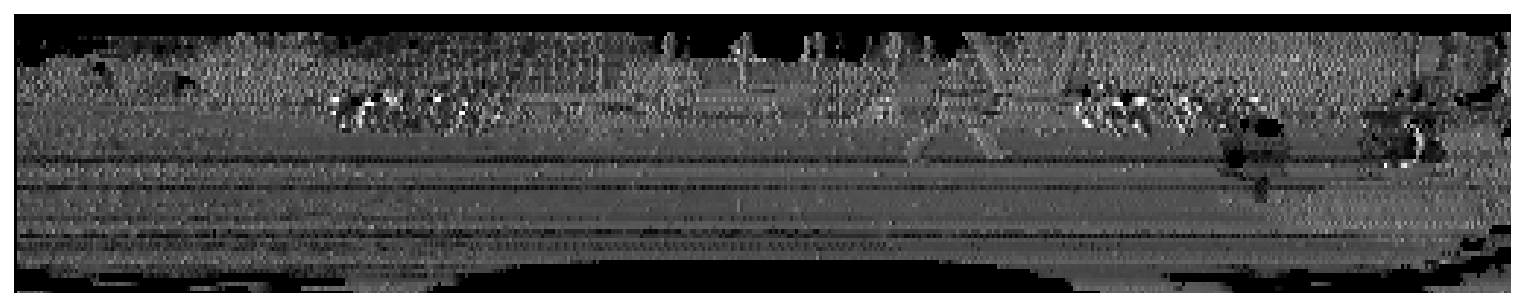

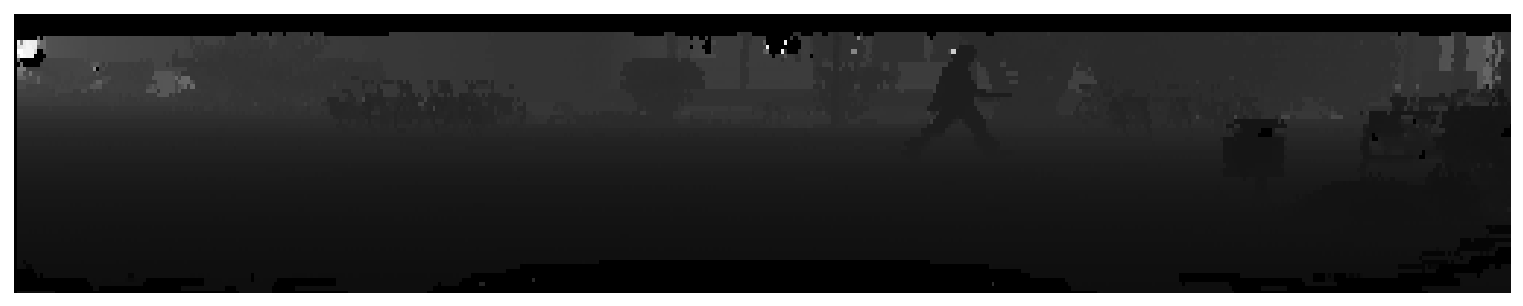

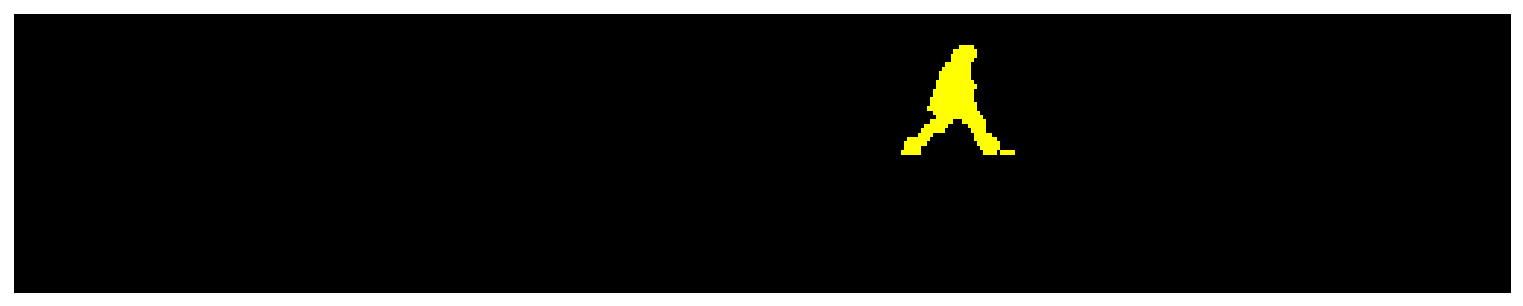

In [1]:
import sys
sys.path.append("..")

import torch
import torch.utils.data

import numpy as np

import matplotlib.pyplot as plt

import core

def visualize(fmap: np.ndarray, pallete: dict):
    img = np.zeros((*fmap.shape[:2], 3), dtype=np.uint8)
    for idx, (cls_name, color) in enumerate(pallete.items()):
        img[fmap == idx] = np.array(color)
    return img

def show_spherical_proj(img: np.ndarray):
    plt.figure(figsize=(12, 6), dpi=128, tight_layout=True)
    plt.axis([512, 0, 0, 64])
    plt.axis("off")
    plt.imshow(img, cmap="gray", aspect=1.5, interpolation='nearest')

args_dataset = core.readconfyaml.read("../conf/dataset/KITTIObj3d.yaml")
args_dataset.root = "../data/kittiobj3d"
dataset = core.dataset.KITTIObj3d(
    **args_dataset,
    split="train"
)
loader = torch.utils.data.DataLoader(
    dataset=dataset,
    batch_size=1,
    shuffle=False
)

for iter, (fmap, gdth) in enumerate(loader):
    show_spherical_proj(fmap[0][0]) # x
    show_spherical_proj(fmap[0][1]) # y
    show_spherical_proj(fmap[0][2]) # z
    show_spherical_proj(fmap[0][3]) # i
    show_spherical_proj(fmap[0][4]) # r
    show_spherical_proj(visualize(gdth[0], args_dataset.pallete))
    break

In [12]:
import numpy as np

# 示例特征图（二维数组）
feature_map = np.array([
    [0.1, 0.3, 0.5],
    [0.7, 0.9, 0.4],
    [0.2, 0.8, 0.6]
])

# 指定范围
min_value = 0.4
max_value = 0.8

# 使用 np.where 查找满足条件的坐标
coordinates = np.where((feature_map >= min_value) & (feature_map <= max_value))

print(coordinates)
# 转换成坐标列表
coordinate_list = list(zip(coordinates[0], coordinates[1]))
print(np.isin(np.array([(0, 2)]), np.array(coordinates)))

print("特征值在指定范围内的像素坐标：", coordinate_list)


(array([0, 1, 1, 2, 2]), array([2, 0, 2, 1, 2]))
[[ True  True]]
特征值在指定范围内的像素坐标： [(0, 2), (1, 0), (1, 2), (2, 1), (2, 2)]
